In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def fac(N):
    ret = 1
    for i in range(1, N+1):
        ret = ret*i
    return ret
print(fac(5))
print(np.log2(fac(5)))

120
6.906890595608519


Text(0, 0.5, '$\\log_2(N!)$')

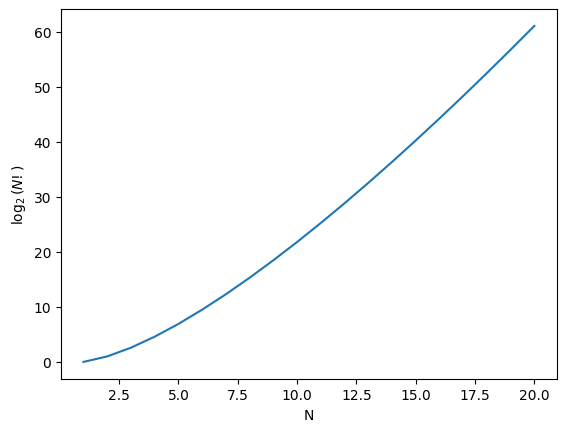

In [4]:
Ns = np.arange(1, 21)
res = [np.log2(fac(N)) for N in Ns]
plt.plot(Ns, res)
plt.xlabel("N")
plt.ylabel("$\\log_2(N!)$")

In [5]:
def count_sort(arr):
    """
    arr: A list of N nonnegative integer elements
    O(N + K + N + N + K) is O(N + K)
    """
    ## Step 1: What's the maximum element
    K = np.max(arr)+1 # O(N)
    
    ## Step 2: Create a list which counts how many 
    ## of each possible number from 0 to N there are
    counts = [0 for i in range(K)] # O(K)
    for i in range(len(arr)): # O(N)
        counts[arr[i]] += 1
    
    ## Step 3: Finish the sort!
    idx = 0 # Keep track of where I am in the process of outputting
    for i in range(K): #O(K + N)
        for j in range(counts[i]): # Over all iterations, inner loop is O(N)
            arr[idx] = i
            idx += 1
            
arr = [2, 7, 1, 1, 7, 4, 5, 7, 6, 1000000000]
print(arr)
print(np.sort(arr))
count_sort(arr)
print(arr)


[2, 7, 1, 1, 7, 4, 5, 7, 6, 1000000000]
[         1          1          2          4          5          6
          7          7          7 1000000000]


KeyboardInterrupt: 

In [13]:
def get_value_at_place(x, B, p):
    """
    x: number
    B: Base
    p: Place
    """
    return (x % (B**p)) // B**(p-1)

get_value_at_place(1337, 10, 5)

0

In [30]:
def lsd_radix_sort(arr, B):
    """
    arr: A list of N nonnegative integer elements
    B: int
        Base of the number system I'm using to express the values in
    """
    ## Step 1: What's the maximum element
    K = B

    ## Repeat this in a loop for every place
    #total_places = max([ len(str(x)) for x in arr ])
    total_places = max([ int(np.ceil(np.log(x)/np.log(B))) for x in arr])
    
    for p in range(1, total_places+1):
        print("Place", B**(p-1))
        ## Step 2: Create a list which counts how many 
        ## of each possible number from 0 to N there are
        buckets = [[] for i in range(K)] # O(K)
        for i in range(len(arr)): # O(N)
            ##TODO: Fill this in
            place_num = get_value_at_place(arr[i], B, p)
            buckets[place_num].append(arr[i])
    
        print(buckets)
        
        ## Step 3: Finish the sort!
        idx = 0 # Keep track of where I am in the process of outputting
        for i in range(K): #O(K + N)
            bucket = buckets[i]
            for j in range(len(bucket)):
                arr[idx] = bucket[j]
                idx += 1

arr = [54, 118, 15, 44, 78, 91000, 98, 19, 33, 52]
lsd_radix_sort(arr, 2)
print(arr)

Place 1
[[54, 118, 44, 78, 91000, 98, 52], [15, 19, 33]]
Place 2
[[44, 91000, 52, 33], [54, 118, 78, 98, 15, 19]]
Place 4
[[91000, 33, 98, 19], [44, 52, 54, 118, 78, 15]]
Place 8
[[33, 98, 19, 52, 54, 118], [91000, 44, 78, 15]]
Place 16
[[33, 98, 44, 78, 15], [19, 52, 54, 118, 91000]]
Place 32
[[78, 15, 19], [33, 98, 44, 52, 54, 118, 91000]]
Place 64
[[15, 19, 33, 44, 52, 54], [78, 98, 118, 91000]]
Place 128
[[15, 19, 33, 44, 52, 54, 78, 98, 118, 91000], []]
Place 256
[[15, 19, 33, 44, 52, 54, 78, 98, 118], [91000]]
Place 512
[[15, 19, 33, 44, 52, 54, 78, 98, 118], [91000]]
Place 1024
[[15, 19, 33, 44, 52, 54, 78, 98, 118, 91000], []]
Place 2048
[[15, 19, 33, 44, 52, 54, 78, 98, 118, 91000], []]
Place 4096
[[15, 19, 33, 44, 52, 54, 78, 98, 118, 91000], []]
Place 8192
[[15, 19, 33, 44, 52, 54, 78, 98, 118], [91000]]
Place 16384
[[15, 19, 33, 44, 52, 54, 78, 98, 118], [91000]]
Place 32768
[[15, 19, 33, 44, 52, 54, 78, 98, 118, 91000], []]
Place 65536
[[15, 19, 33, 44, 52, 54, 78, 98, 118

In [19]:
total_places = max([ len(str(x)) for x in arr ])
print(total_places)

3


In [26]:
np.ceil(np.log(271)/np.log(10))

3.0